In [1]:
# 
# PCA analysis & visualizaton of widget sales, time of sale, buyer age and
# buyer income with design matrix of 1000X4
#
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
#

In [2]:
#
# Set-up capability to 1)vary the size of observations used, read the number of
# of observations, view the first few records and check the shape of the data
# frame read 2)vary the buyer income mean and standard deviation
#
n=999
bi_m=101841
bi_s=25000
#
# Print the header and 1st row to ensure that expected data has been read into
# a data frame
#
Hdr = pd.read_excel(
    "C:\\Users\\daudm\\OneDrive\\Data Analytics-Modeling\\Data Analytics V - Python\\Sincxpress2\\widget_data2.xlsx", nrows=2)
#"C:\Users\daudm\OneDrive\Data Analytics-Modeling\Data Analytics V - Python\Sincxpress2\widget_data.csv"
print("Hdr")
print(Hdr)
#
S = pd.read_excel("C:\\Users\\daudm\\OneDrive\\Data Analytics-Modeling\\Data Analytics V - Python\\Sincxpress2\\widget_data2.xlsx",nrows=n,skiprows=2,header=None)
#
print("S_shape=", S.shape)
#

Hdr
   sale_time  buyer_age  sale_qty  buyer_income
0         10     32.614        10        101841
1         15     34.890        14        101841
S_shape= (999, 4)


In [3]:
#
# Extract the outcome desired i.e. sale quantity as a standalone matrix from
# pandas data frame readin from the excel file
#
sale_qty=np.array(S[2]) # providing a longer name for readability
y=sale_qty # providing a shorter name for ease of typing
#print("sale_qty as an array by itself")
#print(y)
print("sale_qty-shape=", y.shape)
print("sales_qty-mean=",np.round(np.mean(y)))
#

sale_qty-shape= (999,)
sales_qty-mean= 16.0


In [4]:
#
# Extract the design matrix features from the dataframe read into the code. 
# The 3 features are sale_time, buyer_age and buyer_income
# 
sale_time=np.array(S[0]) #longer name
x1=sale_time # shorter name
print("sale_time-shape=", x1.shape)
print("sales_time-mean=",np.round(np.mean(x1)))
#
buyer_age=np.array(S[1]) #longer name
x2=buyer_age # shorter name
print("buyer_age-shape=", x2.shape)
print("buyer_age-mean=",np.round(np.mean(x2)))
#
# Buyer income is set-up as normal random distribution up-front in this code
#
B_I=np.random.normal(bi_m,bi_s,n)
buyer_income=np.array(np.round(B_I)) #longer name
x3=buyer_income # shorter name
#print("buyer_income as an array by itself")
#print(x3)
print("buyer_income-shape=", x3.shape)
print("buyer_income-mean",np.round(np.mean(x3)))
#

sale_time-shape= (999,)
sales_time-mean= 14.0
buyer_age-shape= (999,)
buyer_age-mean= 35.0
buyer_income-shape= (999,)
buyer_income-mean 102037.0


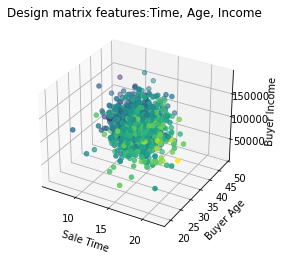

In [5]:
#
# Visualize the design matrix before the PCA analysis in 3 dimensions
#
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,x3,c=y)
ax.set_title("Design matrix features:Time, Age, Income")
ax.set_xlabel('Sale Time')
ax.set_ylabel('Buyer Age')
ax.set_zlabel('Buyer Income')
plt.show()
#

In [6]:
#
# Find the Pearson correlation coefficient between sale time of day
# and age of buyer, age of buyer and buyer income, buyer income and 
# sale time
#
coeff_01=np.corrcoef(x1, x2)
print("coeff_01",np.round(coeff_01,2))
coeff_02=np.corrcoef(x2,x3)
print("coeff_02",np.round(coeff_02,2))# Buyer income coeff changes each time 
# because of randomization of buyer income
coeff_03=np.corrcoef(x3,x1) #Buyer income coeff changes each time
# because of randomization of buyer income
print("coeff_03",np.round(coeff_03,2))
#

coeff_01 [[ 1.   -0.38]
 [-0.38  1.  ]]
coeff_02 [[1. 0.]
 [0. 1.]]
coeff_03 [[ 1.   -0.01]
 [-0.01  1.  ]]


In [7]:
#
#
# Set-up design matrix for PCA fit transform
#
X123 = np.vstack([x1,x2,x3]).T
#
X123_shape = X123.shape
print("X123_shape=", X123_shape)
#

X123_shape= (999, 3)


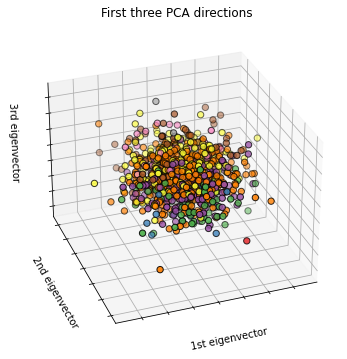

In [9]:
#
# Perform pca fit transform on the PCA of the design matrix
#
X_reduced=PCA(n_components=3).fit_transform(X123)
#X_reduced=PCA(n_components=2)
#
#
# Visualize the design matrix in 3 dimensions again but this time against 
# the 3 PCA components, which are the eigenvectors, as the 3 axis. Notice the 
# difference between the x,y and z and the eigenvector space visualizations.
# As known, PCA fit reduces the dimensionality of design matrices thus speeding
# processing time.
#
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
#
ax.scatter(
   X_reduced[:, 0],
   X_reduced[:, 1],
   X_reduced[:, 2],
   c=y,
   cmap=plt.cm.Set1,
   edgecolor="k",
   s=40,
   )
#
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#
plt.show()
#
